# DS 102 - Project Part 1


In [574]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import datetime
import geopy.distance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


from scipy import stats

sns.set(color_codes=True)

In [372]:
import warnings
warnings.filterwarnings('ignore')

## 1 - Preliminary Data Analysis Code

In [15]:
# Load Data
path = './bikeshare/'
chicago_data = pd.read_csv(path + 'chicago.csv')
day_data = pd.read_csv(path + 'day.csv')
nyc_data = pd.read_csv(path + 'ny.csv')
DC_data = pd.read_csv(path + 'dc.csv')

### Section 1.1 Code

In [16]:
# 1.1.1 - Distribution Male to Female Riders for Chicago
def plot_gender_chicago():
    male_chicago = chicago_data.where(chicago_data['gender'] == 'Male')
    male_chicago.dropna(inplace=True)
    female_chicago = chicago_data.where(chicago_data['gender'] == 'Female') 
    female_chicago.dropna(inplace=True)
    chicago_data['age'] = [2019 - by for by in chicago_data['birthyear']]
    chicago_data['gender_num'] = [1 if g == 'Male' else 0 for g in chicago_data['gender']]
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(0, len(male_chicago), 0.5, label='Men')
    rects2 = ax.bar(1, len(female_chicago), 0.5, label='Women')
    plt.xlabel('Gender')
    plt.ylabel('Frequency')
    plt.title('Distribution M-F Riders in Chicago')
    plt.legend()
    plt.show()

In [17]:
# 1.1.2 - Distribution of Gender for Riders in NYC
def plot_gender_nyc():
    plt.hist(nyc_data['gender'], bins=3)
    plt.xlabel('Gender')
    plt.ylabel('Frequency')
    plt.title('Distribution of Gender for Riders in NYC')
    plt.show()

In [18]:
# 1.1.4 - Distribution of birthyears between Chicago and NYC
def plot_birthyear_chicago_nyc():
    sns.distplot(chicago_data['birthyear'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Chicago')
    sns.distplot(nyc_data['birth year'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'NYC')

    plt.xlabel('Birthyear')
    plt.ylabel('Density')
    plt.title('Distribution of birthyears between Chicago and NYC')
    plt.show()

### Section 1.2 Code

In [542]:
# 1.2.1 - Three distributions of trip duration in minutes across all three cities
# chicago, nyc in minutes, DC in ms
def plot_trip_durations():
    dc_minutes = [int((ms/(1000))%60) for ms in DC_data['Duration (ms)']]
    DC_data['tripduration_minutes'] = dc_minutes
    nyc_minutes = [int(s/60) for s in nyc_data['tripduration']]
    nyc_data['tripduration_minutes'] = nyc_minutes
    chicago_minutes = [int(s/60) for s in chicago_data['tripduration']]
    chicago_data['tripduration_minutes'] = chicago_minutes

    sns.distplot(chicago_minutes, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Chicago')
    plt.xlabel('Trip Duration (Minutes)')
    plt.ylabel('Density')
    plt.title('Distribution of Trip Durations in Chicago')
    plt.show()

    sns.distplot(nyc_minutes, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'NYC')
    plt.xlabel('Trip Duration (Minutes)')
    plt.ylabel('Density')
    plt.title('Distribution of Trip Durations in NYC')
    plt.show()

    sns.distplot(dc_minutes, hist=False, kde=True, kde_kws = {'linewidth': 3}, label = 'DC')
    plt.xlabel('Trip Duration (Minutes)')
    plt.ylabel('Density')
    plt.title('Distribution of Trip Durations in DC')
    plt.show()

In [20]:
# 1.2.3 - Plot the start time of trips split by hour for all three cities.
def plot_trip_start_times():
    nyc_hours = [datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').hour for ts in nyc_data['starttime']]
    chicago_hours = [datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M').hour for ts in chicago_data['starttime']]
    dc_hours = [datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M').hour for ts in DC_data['Start date']]
    sns.distplot(nyc_hours, hist = False, kde = True, label = 'NYC')
    sns.distplot(chicago_hours, hist = False, kde = True, label = 'Chicago')
    sns.distplot(dc_hours, hist = False, kde = True, label = 'DC')

    plt.xlabel('First Hour of Trip Start Times')
    plt.ylabel('Density')
    plt.title('Start time of Trips split by Hour')

    plt.show()

### Section 1.3 Code

In [122]:
# 1.3.1 - Visualize three more attributes
# NYC - lat/lon distance
# Chicago - Stop Trip Times
# DC - Total Minutes Ridden per Month
def plot_three_attributes():
    def plot_nyc_distance():
        def get_distance(row):
            return geopy.distance.distance(row['coords_start'], row['coords_end']).miles

        nyc_data['coords_start'] = list(zip(nyc_data['start station latitude'], nyc_data['start station longitude']))
        nyc_data['coords_end'] = list(zip(nyc_data['end station latitude'], nyc_data['end station longitude']))
        nyc_data['distance_miles'] = nyc_data.apply(get_distance, axis=1)
        
        sns.barplot(x='distance_miles', y='usertype', data=nyc_data)
        plt.xlabel('Average Distance in Miles')
        plt.ylabel('Type of User')
        plt.title('Average Distance Between Start and End Stations in NYC')
        plt.show()

    def plot_chicago_end_time():
        chicago_hours = [datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M').hour for ts in chicago_data['stoptime']]
        sns.distplot(chicago_hours, hist = False, kde = True, label = 'Chicago')

        plt.xlabel('First Hour of Trip End Times')
        plt.ylabel('Density')
        plt.title('End time of Trips split by Hour in Chicago')

        plt.show()

    def plot_dc_duration_by_month():
        DC_data['duration_minutes'] = [int((ms/(1000))%60) for ms in DC_data['Duration (ms)']]
        DC_data['month'] = [datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M').month for ts in DC_data['Start date']]

        DC_data.groupby(['month']).sum()['duration_minutes'].plot()
        plt.xlabel('Month (1-12)')
        plt.ylabel('Total Minutes Ridden')
        plt.title('Total Time Ridden each Month in Washington DC')
        plt.show()
        
    plot_nyc_distance()
    plot_chicago_end_time()
    plot_dc_duration_by_month()

In [142]:
# 1.3.3 - Pick one of the three attribute and plot its distribution if you haven't already. 
# Explore the data further to get a plausible explanation for the shape of the distribution.
def plot_dist_nyc_distance():
    filter_customer = nyc_data["usertype"]=="Customer"
    filter_subscriber = nyc_data["usertype"]=="Subscriber"
    temp1 = nyc_data.where(filter_customer)
    temp2 = nyc_data.where(filter_subscriber)
    
    temp1.dropna(inplace=True)
    temp2.dropna(inplace=True)
    
    sns.distplot(temp1['distance_miles'], hist=True, kde=True, label = 'Customer')
    plt.xlabel('Distance in Miles')
    plt.ylabel('Density')
    plt.title('Distance Between Start and End Stations in NYC for Customers')
    plt.show()
    
    sns.distplot(temp2['distance_miles'], hist=True, kde=True, label = 'Subscriber')
    plt.xlabel('Distance in Miles')
    plt.ylabel('Density')
    plt.title('Distance Between Start and End Stations in NYC for Subscribers')
    plt.show()

### Section 1.4 Code

In [900]:
# Section 1.4*
nyc_data['date'] = [str(datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').date()) for ts in nyc_data['starttime']]
chicago_data['date'] = [str(datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M').date()) for ts in chicago_data['starttime']]
DC_data['date'] = [str(datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M').date()) for ts in DC_data['Start date']]

In [922]:
ny_daily = pd.DataFrame()

season1 = {'start': datetime.datetime(day=1,month=1,year=2016),
               'end': datetime.datetime(day=20,month=3,year=2016)
             }

season2 = {'start': datetime.datetime(day=21,month=3,year=2016),
               'end': datetime.datetime(day=20,month=6,year=2016)
             }

season3 = {'start': datetime.datetime(day=21,month=6,year=2016),
               'end': datetime.datetime(day=22,month=9,year=2016)
             }

season4 = {'start': datetime.datetime(day=23,month=9,year=2016),
               'end': datetime.datetime(day=31,month=12,year=2016)
             }

ny_date = []
ny_mnth = []
ny_season = []
ny_casual = []
ny_registered = []
ny_total = []
ny_weekday = []
grouped = nyc_data.groupby('date')
for name, group in grouped:
    subgroup = nyc_data[nyc_data['date'] == name]
    casual = 0
    registered = 0
    for i in range(len(subgroup)):
        if subgroup.iloc[i]['usertype'] == 'Customer':
            casual += 1
        else:
            registered += 1
        
        
    date_obj = datetime.datetime.strptime(name, '%Y-%m-%d')
    ny_date.append(name)
    ny_mnth.append(date_obj.month)
    ny_weekday.append((date_obj.weekday() + 1) % 7)

    
    
    if season1['start'] <= date_obj <= season1['end']:
        ny_season.append(1)
    elif season2['start'] <= date_obj <= season2['end']:
        ny_season.append(2)
    elif season3['start'] <= date_obj <= season3['end']:
        ny_season.append(3) 
    else:
        ny_season.append(4)
    
    ny_total.append(casual + registered)
    ny_casual.append(casual)
    ny_registered.append(registered)
    
ny_daily['dteday'] = ny_date
ny_daily['mnth'] = ny_mnth
ny_daily['season'] = ny_season
ny_daily['casual'] = ny_casual
ny_daily['registered'] = ny_registered
ny_daily['cnt'] = ny_total
ny_daily['weekday'] = ny_weekday


In [918]:
chicago_daily = pd.DataFrame()

chicago_date = []
chicago_mnth = []
chicago_season = []
chicago_casual = []
chicago_registered = []
chicago_total = []
chicago_weekday = []
grouped = chicago_data.groupby('date')
for name, group in grouped:
    subgroup = chicago_data[chicago_data['date'] == name]
    casual = 0
    registered = 0
    for i in range(len(subgroup)):
        if subgroup.iloc[i]['usertype'] == 'Customer':
            casual += 1
        else:
            registered += 1
        
        
    date_obj = datetime.datetime.strptime(name, '%Y-%m-%d')
    chicago_date.append(name)
    chicago_mnth.append(date_obj.month)
    chicago_weekday.append((date_obj.weekday() + 1) % 7)
    
    
    if season1['start'] <= date_obj <= season1['end']:
        chicago_season.append(1)
    elif season2['start'] <= date_obj <= season2['end']:
        chicago_season.append(2)
    elif season3['start'] <= date_obj <= season3['end']:
        chicago_season.append(3) 
    else:
        chicago_season.append(4)
    
    chicago_total.append(casual + registered)
    chicago_casual.append(casual)
    chicago_registered.append(registered)
    
chicago_daily['dteday'] = chicago_date
chicago_daily['mnth'] = chicago_mnth
chicago_daily['season'] = chicago_season
chicago_daily['casual'] = chicago_casual
chicago_daily['registered'] = chicago_registered
chicago_daily['cnt'] = chicago_total
chicago_daily['weekday'] = chicago_weekday

In [917]:
dc_daily = pd.DataFrame()

dc_date = []
dc_mnth = []
dc_season = []
dc_casual = []
dc_registered = []
dc_total = []
dc_weekday = []
grouped = DC_data.groupby('date')
for name, group in grouped:
    subgroup = DC_data[DC_data['date'] == name]
    casual = 0
    registered = 0
    for i in range(len(subgroup)):
        if subgroup.iloc[i]['Member Type'] == 'Casual':
            casual += 1
        else:
            registered += 1
        
        
    date_obj = datetime.datetime.strptime(name, '%Y-%m-%d')
    dc_date.append(name)
    dc_mnth.append(date_obj.month)
    dc_weekday.append((date_obj.weekday() + 1) % 7)
    
    
    if season1['start'] <= date_obj <= season1['end']:
        dc_season.append(1)
    elif season2['start'] <= date_obj <= season2['end']:
        dc_season.append(2)
    elif season3['start'] <= date_obj <= season3['end']:
        dc_season.append(3) 
    else:
        dc_season.append(4)
    
    dc_total.append(casual + registered)
    dc_casual.append(casual)
    dc_registered.append(registered)
    
dc_daily['dteday'] = dc_date
dc_daily['mnth'] = dc_mnth
dc_daily['season'] = dc_season
dc_daily['casual'] = dc_casual
dc_daily['registered'] = dc_registered
dc_daily['cnt'] = dc_total
dc_daily['weekday'] = dc_weekday

In [924]:
ny_daily.to_csv('./ny_daily.csv')
chicago_daily.to_csv('./chicago_daily.csv')
dc_daily.to_csv('./dc_daily.csv')

In [951]:
# Section 1.4 - Graphs
def plot_bike_rentals_weekday():
    def total_cnt():
        sns.lineplot(x='weekday', y='cnt', data=ny_daily, label='NYC')
        sns.lineplot(x='weekday', y='cnt', data=chicago_daily, label='Chicago')
        sns.lineplot(x='weekday', y='cnt', data=dc_daily, label='DC')

        plt.xlabel('Weekday')
        plt.ylabel('Total # Bike Rentals')
        plt.legend()
        plt.title('Total Bike Rentals throughout the week')
        plt.show()
    
    def registered_cnt():
        sns.lineplot(x='weekday', y='registered', data=ny_daily, label='NYC')
        sns.lineplot(x='weekday', y='registered', data=chicago_daily, label='Chicago')
        sns.lineplot(x='weekday', y='registered', data=dc_daily, label='DC')

        plt.xlabel('Weekday')
        plt.ylabel('Total # Registered Bike Rentals')
        plt.legend()
        plt.title('Registered Bike Rentals throughout the week')
        plt.show()
    
    def casual_cnt():
        sns.lineplot(x='weekday', y='casual', data=ny_daily, label='NYC')
        sns.lineplot(x='weekday', y='casual', data=chicago_daily, label='Chicago')
        sns.lineplot(x='weekday', y='casual', data=dc_daily, label='DC')

        plt.xlabel('Weekday')
        plt.ylabel('Total # Casual Bike Rentals')
        plt.legend()
        plt.title('Casual Bike Rentals throughout the week')
        plt.show()
    
    total_cnt()
    registered_cnt()
    casual_cnt()
    

In [961]:
def plot_casual_daily():
    sns.distplot(ny_daily['casual'], hist = False, kde = True, label = 'NYC')
    sns.distplot(chicago_daily['casual'], hist = False, kde = True, label = 'Chicago')
    sns.distplot(dc_daily['casual'], hist = False, kde = True, label = 'DC')
    plt.xlabel('# Casual Rentals')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Distribution of Casual Bike Rentals')
    plt.show()

In [960]:
def plot_registered_daily():
    sns.distplot(ny_daily['registered'], hist = False, kde = True, label = 'NYC')
    sns.distplot(chicago_daily['registered'], hist = False, kde = True, label = 'Chicago')
    sns.distplot(dc_daily['registered'], hist = False, kde = True, label = 'DC')

    plt.xlabel('# Registered Rentals')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Distribution of Registered Bike Rentals')
    plt.show()

## 2 - Hypothesis Testing Code

### Section 2.1 Code

In [295]:
# Initial Setup for NYC Data
# Casual = 0; Non-casual = 1
# Split dataset into S1, S2, S3
# Section #2.1
n = len(nyc_data.index)

shuffled_nyc_data = nyc_data.sample(frac=1).reset_index(drop=True)

indicators_Y = [1 if u_type == 'Subscriber' else 0 for u_type in shuffled_nyc_data['usertype']]
shuffled_nyc_data['indicator_y'] = indicators_Y

shuffled_nyc_data['starthour'] =  [datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').hour
                                   for ts in shuffled_nyc_data['starttime']]
shuffled_nyc_data['endhour'] = [datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').hour 
                                for ts in shuffled_nyc_data['stoptime']]

sixty = int(n * 0.6)
s1_nyc_data = shuffled_nyc_data.iloc[:sixty, :]

remaining = n - sixty
s2_nyc_data = shuffled_nyc_data.iloc[sixty: sixty + int(remaining/2), :]

s3_nyc_data = shuffled_nyc_data.iloc[sixty + int(remaining/2):, :]
s3_truth = s3_nyc_data.reset_index(drop=True)

s1 = (0, len(s1_nyc_data))
s2 = (sixty, sixty + int(remaining/2))
s3 = (sixty + int(remaining/2), -1)

def setup_logisitic_model(data):
    logistic_model = LogisticRegression(solver = 'lbfgs')
    # Train on S1
    logistic_model.fit(
        data[['tripduration', 'starthour', 'endhour']].iloc[s1[0] : s1[1]],
        data['indicator_y'].iloc[s1[0] : s1[1]])
    return logistic_model

### Section 2.2 Code

In [366]:
# Section 2.2
def predict_and_plot(model):
    prediction_proba_s2 = model.predict_proba(
        shuffled_nyc_data[['tripduration', 'starthour', 'endhour']].iloc[s2[0]: s2[1]])

    prediction_proba_s3 = model.predict_proba(
        shuffled_nyc_data[['tripduration', 'starthour', 'endhour']].iloc[s3[0]: s3[1]])

    count_casual_s2 = shuffled_nyc_data.iloc[s2[0]:s2[1]].apply(lambda x: True if x['indicator_y'] == 0 else False , axis=1)
    numCasualS2 = len(count_casual_s2[count_casual_s2 == True].index)

    P_j = []
    for j in prediction_proba_s3:
        prob_count = 0

        for index, indicator in enumerate(s2_nyc_data['indicator_y']):
            if indicator == 0:
                if prediction_proba_s2[index][1] > j[1]:
                    prob_count += 1
        P_j.append(prob_count/numCasualS2)
        #print(len(P_j))

    # Casual/True if 0, Subscriber/False if 1

    casual_pj = []      # Null
    subscriber_pj = []  # Non-null

    s3_indicators = shuffled_nyc_data.iloc[s3[0]:s3[1]].apply(lambda x: True if x['indicator_y'] == 0 else False , axis=1)
    for index, indicator in enumerate(s3_indicators):
        if indicator == True:
            casual_pj.append(P_j[index])
        else:
            subscriber_pj.append(P_j[index])

    plt.hist(casual_pj)
    plt.xlabel('P-Value')
    plt.ylabel('Count')
    plt.title('P-Values for Casual Riders')
    plt.show()

    plt.hist(subscriber_pj)
    plt.xlabel('P-Value')
    plt.ylabel('Count')
    plt.title('P-Values for Non-Casual Riders')
    plt.show()
    
    return P_j

def predict_no_plot(model):
    prediction_proba_s2 = model.predict_proba(
        shuffled_nyc_data[['tripduration', 'starthour', 'endhour']].iloc[s2[0]: s2[1]])

    prediction_proba_s3 = model.predict_proba(
        shuffled_nyc_data[['tripduration', 'starthour', 'endhour']].iloc[s3[0]: s3[1]])
    
    s2_nyc_data['prob_casual'] = [p[1] for p in prediction_proba_s2]
#     s3_nyc_data['prob_casual'] = [p[1] for p in prediction_proba_s3]

    count_casual_s2 = shuffled_nyc_data.iloc[s2[0]:s2[1]].apply(lambda x: True if x['indicator_y'] == 0 else False , axis=1)
    numCasualS2 = len(count_casual_s2[count_casual_s2 == True].index)

    P_j = []
    for j in prediction_proba_s3:
        isGreater = s2_nyc_data[s2_nyc_data['indicator_y'] == 0]['prob_casual'] > j[1]
        P_j.append(sum(isGreater)/numCasualS2)
#         prob_count = 0
#         for index, indicator in enumerate(s2_nyc_data['indicator_y']):
#             if indicator == 0:
#                 if prediction_proba_s2[index][1] > j[1]:
#                     prob_count += 1
#         P_j.append(prob_count/numCasualS2)

    return P_j

### Section 2.3 Code

In [307]:
# Section #2.3
def benjamini_hochberg(p_values, alpha):
    # returns decisions: a binary vector of the same length as p-values, 
    # where decisions[i] is 1 if p_values[i] is deemed significant at level alpha, and 0 otherwize
    
    # TODO: fill in
    temp_array = np.sort(p_values)

    largest = 0
    for k in range(len(p_values)):
        if temp_array[k] <= k * alpha/n:
            largest = temp_array[k]
    decisions = [int(p <= largest) for p in p_values]

    return decisions

In [341]:
bh_decisions = benjamini_hochberg(P_j, alpha=0.2)
# 1.Calculate FDP and Sensitivty with calculated BH Decisions and Y_Indicators from the dataframe (Decision Matrix)
FN = sum([1 if (bh_decisions[i] == 0 and s3_truth['indicator_y'][i] == 1) else 0 for i in range(len(bh_decisions))])
TP = sum([1 if (bh_decisions[i] == 1 and s3_truth['indicator_y'][i] == 1) else 0 for i in range(len(bh_decisions))])
FP = sum([1 if (bh_decisions[i] == 1 and s3_truth['indicator_y'][i] == 0) else 0 for i in range(len(bh_decisions))])

sensitivity1 = TP / (FN + TP)
FDP1 = FP / (FP + TP)
# 2. Repeat whole process 200 times
# 3. Compute average FDP and Sensitivity over the 200 trials

In [ ]:
sensitivity = [sensitivity1]
FDP = [FDP1]
p_values = [P_j]

In [566]:
len(p_values), len(sensitivity), len(FDP)

(254, 254, 254)

In [570]:
def run_n_trials(num_trials=200 - len(p_values)):

    for k in range(num_trials):
        
        shuffled_nyc_data = nyc_data.sample(frac=1).reset_index(drop=True)

        indicators_Y = [1 if u_type == 'Subscriber' else 0 for u_type in shuffled_nyc_data['usertype']]
        shuffled_nyc_data['indicator_y'] = indicators_Y

        shuffled_nyc_data['starthour'] =  [datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').hour
                                           for ts in shuffled_nyc_data['starttime']]
        shuffled_nyc_data['endhour'] = [datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').hour 
                                        for ts in shuffled_nyc_data['stoptime']]

        sixty = int(n * 0.6)
        s1_nyc_data = shuffled_nyc_data.iloc[:sixty, :]

        remaining = n - sixty
        s2_nyc_data = shuffled_nyc_data.iloc[sixty: sixty + int(remaining/2), :]

        s3_nyc_data = shuffled_nyc_data.iloc[sixty + int(remaining/2):, :]
        s3_truth = s3_nyc_data.reset_index(drop=True)

        s1 = (0, len(s1_nyc_data))
        s2 = (sixty, sixty + int(remaining/2))
        s3 = (sixty + int(remaining/2), -1)

        log_model = setup_logisitic_model(shuffled_nyc_data)
        p_vals = predict_no_plot(log_model)

        bh_decisions = benjamini_hochberg(p_vals, alpha=0.2)
        # 1.Calculate FDP and Sensitivty with calculated BH Decisions and Y_Indicators from the dataframe (Decision Matrix)
        FN = sum([1 if (bh_decisions[i] == 0 and s3_truth['indicator_y'][i] == 1) else 0 for i in range(len(bh_decisions))])
        TP = sum([1 if (bh_decisions[i] == 1 and s3_truth['indicator_y'][i] == 1) else 0 for i in range(len(bh_decisions))])
        FP = sum([1 if (bh_decisions[i] == 1 and s3_truth['indicator_y'][i] == 0) else 0 for i in range(len(bh_decisions))])

        sensitivity.append(TP / (FN + TP))
        FDP.append(FP / (FP + TP))
        p_values.append(p_vals)
        
        print(len(p_values))
        
    return sum(sensitivity)/200, sum(FDP)/200


## 3 - Gaussian Mixture Models / E-M Algorithm Code

### Section 3.2 Code

In [376]:
# Section 3.2
def gmm_expectation_maximization(data, pi_0, mu_0, pi_1, mu_1, num_steps):
    """ Perform expectation maximization assuming a Gaussian mixture model consisting of two Gaussians.
    
    Parameters
    ----------
    data : numpy array of shape n
        The matrix of datapoints we've observed.
    pi_0 : float
        Our initial estimate of pi_0.
    mu_0 : float
        Our initial estimate of mu_0.
    pi_1 : float
        Our initial estimate of pi_1.
    mu_1 : float
        Our initial estimate of mu_1.
    num_steps : int
        The number of times to run the expectation maximization.
    """
    for step in range(num_steps):
        # First run the expectation step.
        gaussian_prob_0 = (np.exp(-(data - mu_0) ** 2 / (2 * sigma_0)) /
                           (np.sqrt(2 * np.pi) * sigma_0))
        gaussian_prob_1 = (np.exp(-(data - mu_1) ** 2 / (2 * sigma_1)) /
                           (np.sqrt(2 * np.pi) * sigma_1))
        normalizing_factor = pi_0 * gaussian_prob_0 + pi_1 * gaussian_prob_1
        # We can consider z_k to be the vector of estimated probabilities that each
        # datapoint belongs to the distribution k. In other words the ith index is an
        # estimate of P(K=k|x_i).
        z_0 = pi_0 * gaussian_prob_0 / normalizing_factor
        z_1 = pi_1 * gaussian_prob_1 / normalizing_factor
        
        # Now run the maximization step.
        # N_k is the estimated number of points assigned to the distribution k.
        N_0 = np.sum(z_0)
        N_1 = np.sum(z_1)
        pi_0 = N_0 / data.shape[0]
        pi_1 = N_1 / data.shape[0]
        mu_0 = np.sum(data * z_0) / N_0
        mu_1 = np.sum(data * z_1) / N_1
        
    return pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1

In [784]:
chicago_data['tripduration_minutes'] = [int(s/60) for s in chicago_data['tripduration']]
chicago_data['start_minutes'] = [datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M').hour * 60 + datetime.datetime.strptime(ts, '%m/%d/%Y %H:%M').minute for ts in chicago_data['starttime']]
chicago_casual = chicago_data[chicago_data['usertype'] == 'Customer']
chicago_non_casual = chicago_data[chicago_data['usertype'] == 'Subscriber']
chicago_one_hour = chicago_data[chicago_data['tripduration_minutes'] <= 60]

In [453]:
np.mean(chicago_casual[chicago_casual['tripduration_minutes'] <= 60]['tripduration_minutes']), np.std(chicago_casual[chicago_casual['tripduration_minutes'] <= 60]['tripduration_minutes'])


(22.512814038631486, 11.946911294577573)

In [454]:
np.mean(chicago_non_casual[chicago_non_casual['tripduration_minutes'] <= 60]['tripduration_minutes']), np.std(chicago_non_casual[chicago_non_casual['tripduration_minutes'] <= 60]['tripduration_minutes'])


(10.91453272050777, 7.27575374946815)

In [518]:
sigma_0 = 11.946911294577573
sigma_1 = 7.27575374946815
def run_gmm_chicago_60(num_steps=100):
    pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1 = gmm_expectation_maximization(data=chicago_one_hour['tripduration_minutes'],
                                                                            pi_0=0.237,
                                                                            mu_0=50,
                                                                            pi_1=0.762,
                                                                            mu_1=25,
                                                                            num_steps=num_steps)
    print("---Distribution 0 Estimated Parameters---")
    print("pi_0={:.4f}, mu_0={:.2f}, sigma_0={:.2f}".format(pi_0, mu_0, sigma_0))
    print("---Distribution 1 Estimated Parameters---")
    print("pi_1={:.4f}, mu_1={:.2f}, sigma_1={:.2f}".format(pi_1, mu_1, sigma_1))
    
    return pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1

### Section 3.3 Code

In [534]:
# Section 3.3
def calculate_posterior(data, pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1):
    posterior_probs = []
    for j in data['tripduration_minutes']:
        numerator = stats.norm(loc=mu_1,scale=sigma_1).pdf(j) * pi_1
        denom = stats.norm(loc=mu_1,scale=sigma_1).pdf(j) * pi_1 + stats.norm(loc=mu_0,scale=sigma_0).pdf(j) * pi_0

        posterior_probs.append(numerator / denom)
    return posterior_probs

### Section 3.4 Code

In [560]:
# Section 3.4
def error_of_chicago_classifier(data, posterior_probs, threshold=0.5, isDCdata=False):
    predicted_subscriber = []
    for prob in posterior_probs:
        if prob >= threshold:
            predicted_subscriber.append(True)
        else:
            predicted_subscriber.append(False)
    
    num_correct = 0
    if isDCdata:
        true_prediction = [True if u == 'Registered' else False for u in data['Member Type']]
    else:
        true_prediction = [True if u == 'Subscriber' else False for u in data['usertype']]
    for i in range(len(data)):
        if predicted_subscriber[i] == true_prediction[i]:
            num_correct += 1
    return num_correct / len(true_prediction)
    


### Section 3.5 Code

In [563]:
# Section 3.5
def compute_ny_dc_error():
    posterior_nyc = calculate_posterior(nyc_data, pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1)
    posterior_dc = calculate_posterior(DC_data, pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1)
    
    nyc_error = error_of_chicago_classifier(nyc_data, posterior_nyc)
    dc_error = error_of_chicago_classifier(DC_data, posterior_dc, isDCdata=True)
    
    print(nyc_error, dc_error)
    return nyc_error, dc_error

## 4 - Causality & Experiment Design Code

In [773]:
# Section 4.1 2SLS

# 1 if 'Nice Weather', 0 if 'Adverse Weather'
day_data['modified_weathersit'] = [1 if ws == 1 else 0 for ws in day_data['weathersit']]

data_N = len(day_data)
humidity_z = np.array(day_data['hum']).reshape((data_N, 1))
temp_w = np.array(day_data['temp']).reshape((data_N, 1))

weather_x_star = np.array(day_data['weathersit']).reshape((data_N, 1))

total_bike_rentals = np.array(day_data['cnt']).reshape((data_N, 1))
casual_bike_rentals = np.array(day_data['casual']).reshape((data_N, 1))
registered_bike_rentals = np.array(day_data['registered']).reshape((data_N, 1))

In [774]:
def compute_2SLS(rentals):
    # First Stage
    stage1_features = np.concatenate([humidity_z, temp_w], axis = 1)
    stage1_features_w_const = sm.add_constant(stage1_features) # prepend a constant feature for intercept term
    stage1_ols = sm.OLS(weather_x_star, stage1_features_w_const).fit()
    # stage1_ols_results = (stage1_ols).params
    
    weather_predicted = stage1_ols_results[0] + \
                         stage1_ols_results[1] * humidity_z + \
                         stage1_ols_results[2] * temp_w
    
    # Second Stage
    stage2_features = np.concatenate([weather_predicted, temp_w], axis=1)
    stage2_features_w_const = sm.add_constant(stage2_features) # prepend a constant feature for intercept term
    stage2_model = sm.OLS(rentals, stage2_features_w_const).fit()
    # stage2ols_results = stage2_model.params 
    # alpha_2SLS = stage2ols_results[1]

    return stage2_model

## 1 - Preliminary Data Analysis

### 1.1 - Demographic Information

#### 1.1.1 - Plot the distribution of male to female riders for chicago.csv

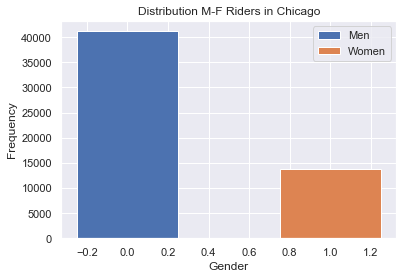

In [19]:
plot_gender_chicago()

#### 1.1.2 - Plot the distribution of the gender column for ny.csv

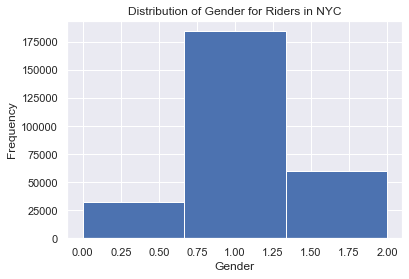

In [20]:
plot_gender_nyc()

#### 1.1.3 - Given the results in Chicago, make an educated guess as to the mapping from numerical value to Male/Female/Unspecified within the ny.csv dataset

Based on the gender breakdown from the Chicago data set, I would predict that the numerical mapping for gender in the NYC dataset is as follows:

0: Unspecified

1: Male

2: Female

#### 1.1.4 - Plot the distribution of the birth years of bike renters in Chicago and NY

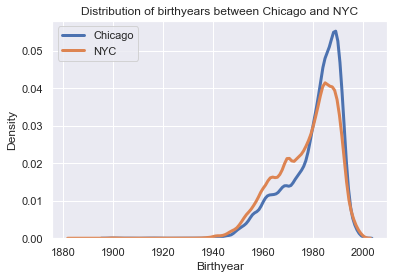

In [29]:
plot_birthyear_chicago_nyc()

#### 1.1.5 - Discuss the results you observed in the age plots and whether this fits with your intuition. Would you remove any data? If so, why?

The general shape of the density plots suggest that the birthyear data between the two cities is very similar. I do find that the peak around the 1980-1990's age range is higher for the Chicago dataset however I don't believe that this should raise any significant concern. To account for this small discrepancy, it might be a good idea to remove rows that have gender labeled as 'Unspecificed' in the NYC data since the Chicago data has only Male and Female identifiers. This could be the cause of the slight variation in the plots.

### 1.2 - Rental Times

#### 1.2.1 - Plot the three distribution of trip duration in minutes across all three cities

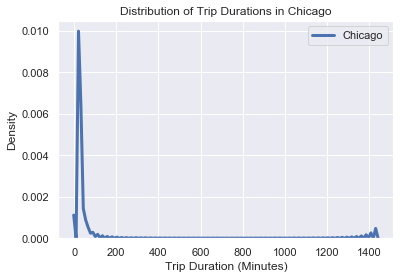

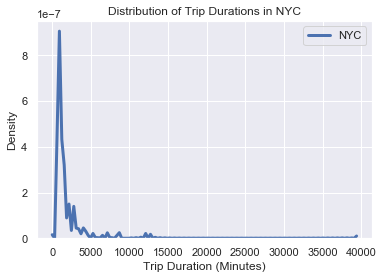

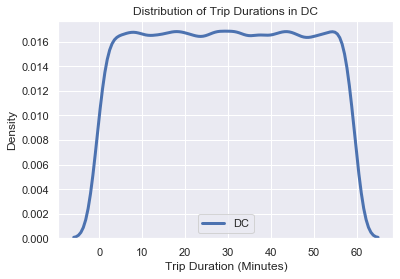

In [107]:
plot_trip_durations()

#### 1.2.2 - Are the plots you generated useful? If not, plot them again so that the visualization is more useful.

The trip duration times of the DC data seems to be the most insightful. The NYC and Chicago data seem to have large outliers that make the graphs extend far along the X-axis. Originally, I had them overlayed onto 1 graph, but these large outliers made the data hard to read and after separating them into their own, the trends of each city are much easier to identify. 

#### 1.2.3 - Plot the start time of trips split by hour for all three cities.

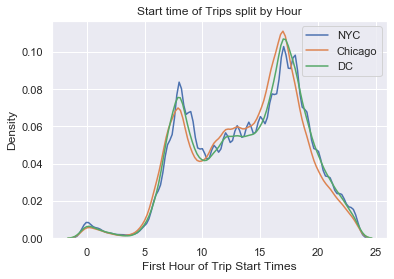

In [155]:
plot_trip_start_times()

#### 1.2.4 - Discuss the results you observed in the start time plots. Do they fit your intuition?

The data across the three different cities lines up quite nicely with one another. Intuitively, the data also makes logical sense. Many bike trips start in the early morning or in the late afternoon (4-6 PM). This lines up well with commuter times. Of course, the trips slow down in the early morning and late evening. This leads me to say that the data does indeed fit with my intuition. 

### 1.3 - Further Exploration

#### 1.3.1 - Visualize three more attributes.

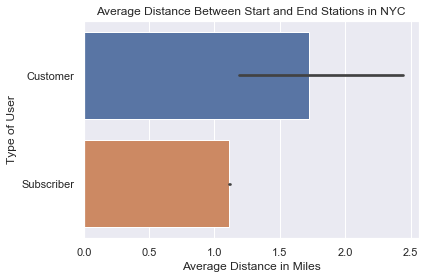

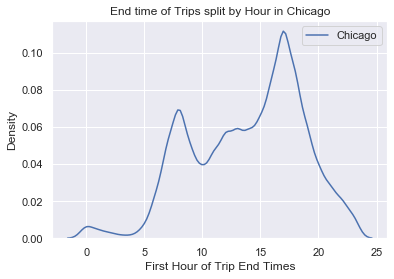

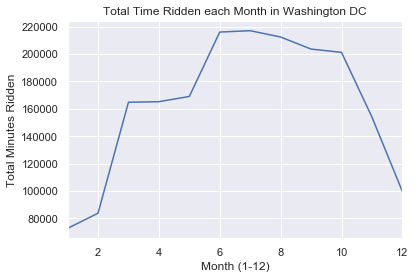

In [126]:
plot_three_attributes()

#### 1.3.2 - Discuss any insight you obtained from these three new visualizations.

The first plot shows the average distance, in miles, between the start and end stations of each ride for each type of user. Its interesting to see that Subscribers have shorter average bike rides then "normal" cusomters. The distinction between these two categories is not clear

The second plot shows the relative times that trips ended in Chicago. This was very similar to the start trips plots and matches up accordingly. 

The final plot shows the total minutes ridden across the 12 months. We can clearly see that the total time ridden increases over the summer months and declines in the winter. 

#### 1.3.3 - Pick one of the three attribute and plot its distribution if you haven't already. Explore the data further to get a plausible explanation for the shape of the distribution. For example you could explore whether the attribute is correlated with another attribute.

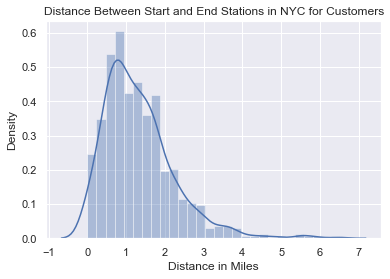

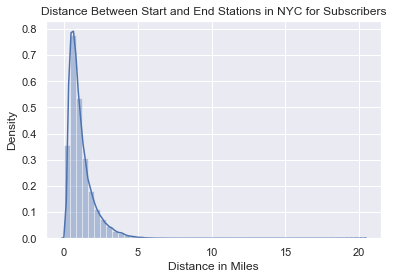

In [143]:
# It makes sense that there are many shorter distance bike rides, but there was a surprising number of rides that had about 5000 miles between the start and end locations.
plot_dist_nyc_distance()

#### 1.3.4 - Given the insights you obtained from the data, write down a hypothesis that you think is important and how you would go about testing it.

I hypothesize that 'Subscribers' primarily use the bike service for daily commuting purposes and not for seemingly random adventures/fun. This might explain why the average distance ridden for 'Customers' is higher than that of 'Subscribers'. One way to test this would be to compare the station locations for subscribers and see if they generally follow a trend of starting and ending at the same locations each day. On the other hand, the starting and ending stations for Customers would likely be more sporatic.

### 1.4 - Creating a new dataset

When creating these new daily datasets for each city, I focused on recreating all the columns related to the date, season, weekday, and the number of bike rentals made (split between casual and non-casual as well). I first started out by grouping the rows of the data sets by the date. This allowed me to easily aggregate the number of bike rentals made on each day. Afterwards I cleaned up and calculated the various date-related columns. For the most part I was able to recreate most of the columns found in the `Daily Summary data` apart from the holiday and weather columns.

I first plotted the distribution of number of casual and registered bike rentals for each daily city data set. It was interesting to see that the data for NYC differed from Chicago and DC quite a bit in both cases, more so for registered rentals. This might be due to a large number of commuters in NYC and how popular biking is in general. 

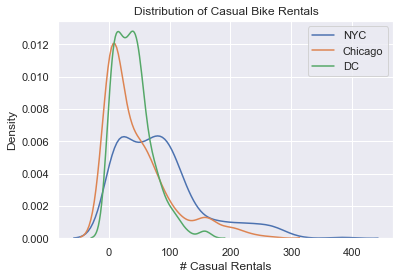

In [962]:
plot_casual_daily()

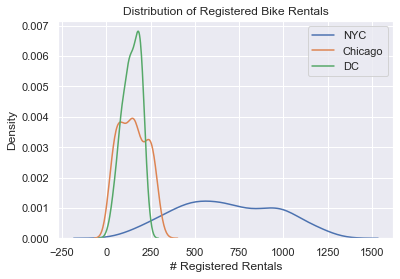

In [963]:
plot_registered_daily()

I then decided to take a look at the number of rentals throughout the week for each city. In this case again, NYC proved to be unique in the results. For registered rentals, NYC had a much larger number of rentals than the other two cities. All cities however, generally followed the trend of increasing during the weekdays and decreasing on weekends. On the flip side of things, casual bikers had the opposite trend. They peaked over weekends and there was a decrease over the weekdays. Again, NYC had the most number of rentals, but the difference was not as clear cut as it was for registered rentals.

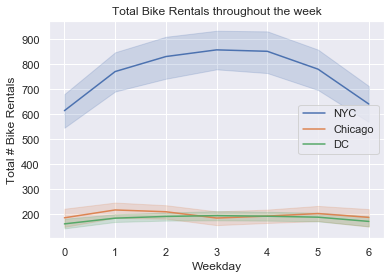

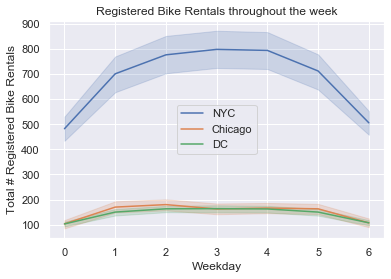

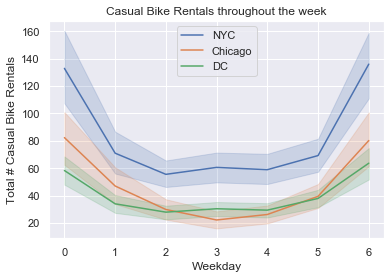

In [952]:
plot_bike_rentals_weekday()

## 2 - Hypothesis Testing

### 2.1 - Logistic Regression: Set-up and Train

In [296]:
# Section 2.1
logistic_regression = setup_logisitic_model(shuffled_nyc_data)

### 2.2 - Logistic Regression: Initial Prediction and Plot

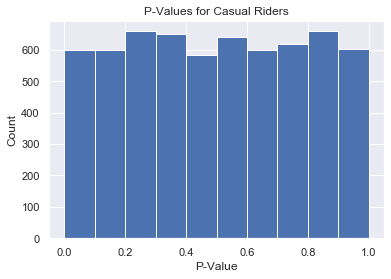

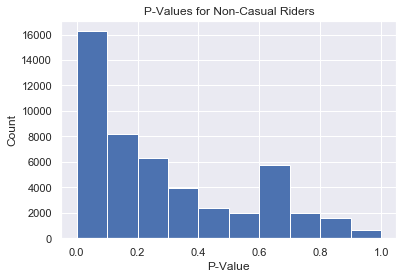

In [300]:
# Section 2.2 
predict_and_plot(logistic_regression)

### 2.3 - Logistic Regression: Post Analysis

In [572]:
# Section 2.3 - Need to continue
avg_sensitivity, avg_FDP = run_n_trials()

In [571]:
avg_sensitivity, avg_FDP

(0.00048336858420250264, 0.14160714285714252)

In [567]:
sum(sensitivity[0:200])/200, sum(FDP[0:200])/200

(0.00038043692714348834, 0.11255952380952358)

## 3 - Gaussian Mixture Models of Trip Durations

### 3.1 - Why should there be a difference in trip durations for different user types? 

I believe that the first indication that the trip duration distributions might be different for casual and non-casual riders can be seen in **section #1.2.3** which shows trip start times across all the 3 cities. There are heavy spikes in the morning and late afternoon. These times overlap with general commute times for the average working person which suggests that individuals are using the bike rentals as a means of commuting to and from work. 

The second reason why I think that there may be a difference can be seen in **section #1.3.3** which shows the plots of the distributions of the distance between start and end bike stations. For casual customers there is a much wider range of distance, but for subscribers (or non-casual riders) the range is smaller which leads to this group having a lower average distance between stations. This can be seen in the first plot of **section #1.3.1**. 

### 3.2 - Expectation-Maximization (E-M) Algorithm on Trip Durations

In [545]:
pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1 = run_gmm_chicago_60(num_steps=100)

---Distribution 0 Estimated Parameters---
pi_0=0.3024, mu_0=25.45, sigma_0=11.95
---Distribution 1 Estimated Parameters---
pi_1=0.6976, mu_1=8.34, sigma_1=7.28


I ran the GMM algorithm with various initializations. I used the calculated sigmas from the actual dataset each time but the learning parameters and the means varied. For the means, I tried using the calculated means of the data as well as values +/- 5 and 10 from the calculated means. As for the learning parameters, I used random values, proportion of casual to non-casual riders, and the equal values (0.5, 0.5). Despite trying all these different types of initializations the results came back the same every time. 

For Distribution 0 the learning paramter, mean, and variance were consistently:

$\pi = 0.3024, \mu = 25.45 \sigma = 11.95$

For Distribution 1 the learning paramter, mean, and variance were consistently:

$\pi = 0.6976, \mu = 8.34 \sigma = 7.28$

### 3.3 - Posterior Probabilities of each Customer

Given the output of the E-M Algorithm, distribution 1 more accurately reflected the behavior of the Subscribed (Non-Casual) cusomters 

In [535]:
posterior_probs = calculate_posterior(chicago_data, pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1)

### 3.4 - Error Rate of the Classifier

In [536]:
error_of_chicago_classifier(posterior_probs)

0.8088339271603056

### 3.5 - Classification Performance for NYC & DC Data

In [564]:
nyc_error, dc_error = compute_ny_dc_error()

0.8160788734022645 0.4142568525163586


The classifier performs similary with the NYC data set however, there is a large drop off when it comes to the DC data set. 

## 4 - Causality & Experiment Design


### 4.1 - 2SLS to estimate the effect of precipitation on the numebr of bike rentals

#### 4.1.1 - The Causal Model

1. <img src="Causal Model.png">

2. When conducting an 2SLS analysis we need to be certain that the instrumental variable (IV) is only able to affect the final prediction through means of one of the other dependent variables. In this case we assume that humidity, our IV, only affects the total number of bike rentals through the dependent variable 'weathersit'. Additionally, our model assumes that all other variables besides 'weathersit' should remain fixed. In the context of this problem, this might seem difficult to achieve as temperature tends to be variable and affixed to weather as well. 

#### 4.1.2 - 2 Stage Least Squares

1. For this 2SLS procedure, we need to start out by running a standard linear regression of humidity and temperature onto our dependent variable, weather (weathersit). This allows to 'predict' fitted values for our weathersit variable. Once we obtain the proper coefficients, we can build the weathersit equation from the coefficients and the two variables, humidity and temperature. Afterwards, we just run OLS now with the fitted weather and temperature variables onto the total number of bike rentals. This should give us coefficients for the final equation which should be a linear estimation for calculating the total number of bike rentals based off of these variables. 


In [775]:
total_rentals_model = compute_2SLS(total_bike_rentals)
total_rentals_model.params

array([ 623.01822631, 1227.74019027, 6265.24251696])

In [776]:
casual_rentals_model = compute_2SLS(casual_bike_rentals)
casual_rentals_model.params

array([-331.10548602,  352.28531318, 1930.11954146])

In [777]:
registered_rentals_model = compute_2SLS(registered_bike_rentals)
registered_rentals_model.params

array([ 954.12371233,  875.45487709, 4335.1229755 ])

2. Treatment Effect for total number of bike rentals

$Y = 623.0 + 1227.7 * X + 6265.2 * Z$ where $Y = $ total number of all bike rentals, $X = $ weathersit, and $Z = $ temperature

Treatment effect of weathersit for the total number of bike rentals per day is: 1227.7

3. Treatment Effect for casual and registered bike rentals

Casual: $Y = -331.1 + 352.3 * X + 1930.1 * Z$ 

Registered: $Y = 954.1 + 875.5 * X + 4335.1 * Z$ 

where $Y = $ total number of casual/registered bike rentals, $X = $ weathersit, and $Z = $ temperature

Treatment effect of weathersit for the total number of casual bike rentals per day is: 352.3

Treatment effect of weathersit for the total number of registered bike rentals per day is: 875.5

#### 4.1.3 - Discussion

1. This problem wanted to explore the affects that adverse weather might have on the total number of bike rentals on a given day. We used 2 Stage Least Squares method to isolate predicted weather data which was then, in turn, used to estimate the total number of bike rentals. From the results, we learned that weathersit does have a significant impact on the total number of bike rentals per day.

2. The magnitude is higher for the registered user bike rentals. One reason might be is that registered users are more likely to be using bike rentals for commuting purposes and thus are more willing to go through with a bike rental during times of adverse weather.

3. Given the goal of the problem is to find causal relationships amongst the different variables and how they might lead to estimating the total number of bike rentals in a given day, I would say that a potentially significant variable would be whether or not the day is a weekday or working day. Since there is the tendency for registered users to more likely be daily commuters, this information might be helpful in determining total bike rentals. Additionally, in the causal model above, we have indicated that temperature is a confounding variable for total bike rentals as well as weather. I think that weather should have the same effect on temperature where it can pose as confounding variable between temperature and total bike rentals. Thus, I believe that the arrow in-between the these two variables should be two-sided (temp points to weather and vice-versa).

4. Given a chance to design my own experiment related to this similar idea, I would like to dive deeper into the weather data. For this problem weather was identified as being adverse or 'nice' however when looking at the original data, weather can actually be labled as four different categories. This more detailed view of weather day may be able to provide useful insights into how we can further improve estimations on the total number of bike rentals